In [69]:
!pip install rasterio

In [70]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg

# SELECCION DE VARIABLES

## Pendiente:

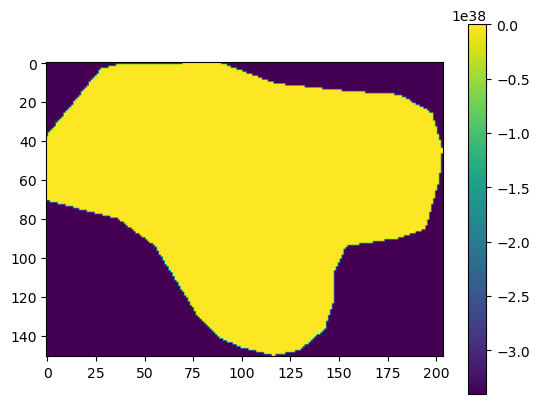

In [71]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
pendiente=raster.read(1)
plt.imshow(pendiente)
plt.colorbar();

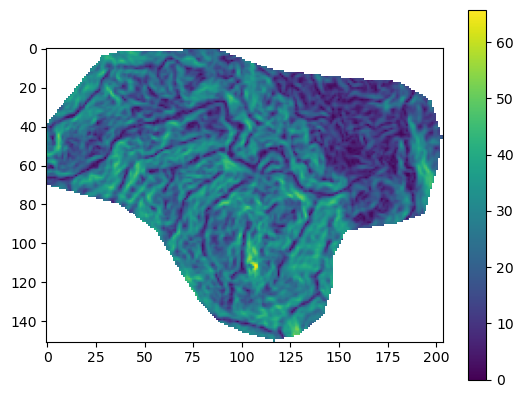

In [72]:
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();

In [73]:
type(pendiente)

numpy.ndarray

In [74]:
np.shape(pendiente)

(151, 204)

In [75]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(19705,)

## Aspecto:

(19705,)

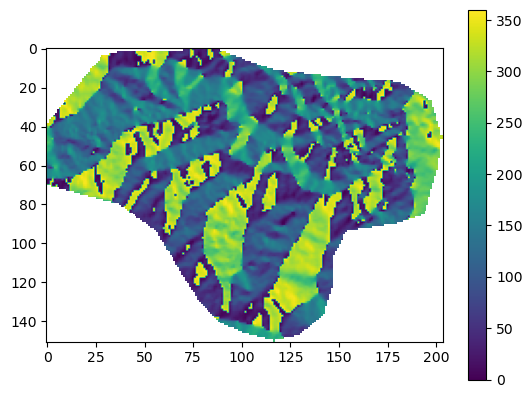

In [76]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

In [77]:
np.shape(aspecto)

(151, 204)

## Curvatura:

(10037,)

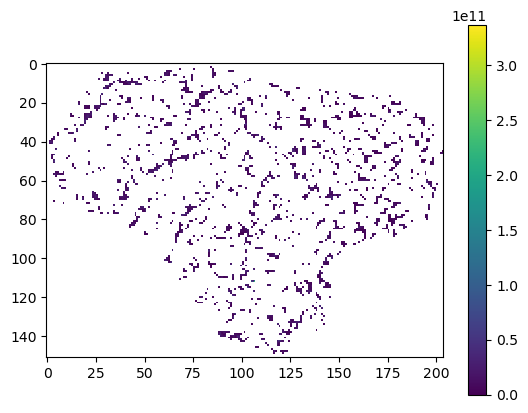

In [78]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/CURV_21.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-100,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
curvatura_vector_MenM.shape

# Cobertura:

(19705,)

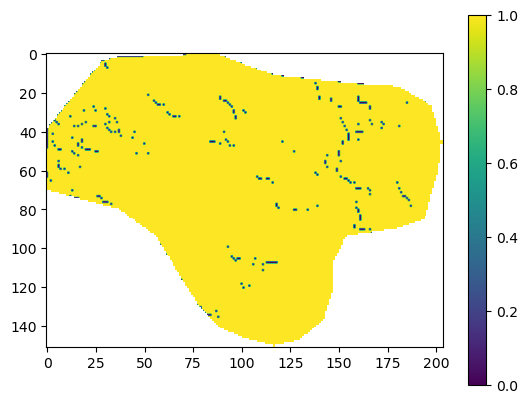

In [79]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Cobert_final1.tif?raw=true')
cobertura=raster.read(1)
cobertura=np.where(cobertura>=3,np.nan,cobertura)
cobertura_vector=cobertura.ravel()
cobertura_vector_MenM=cobertura_vector[~np.isnan(cobertura_vector)]
plt.imshow(cobertura)
plt.colorbar()
cobertura_vector_MenM.shape

# Geologia

(30804,)

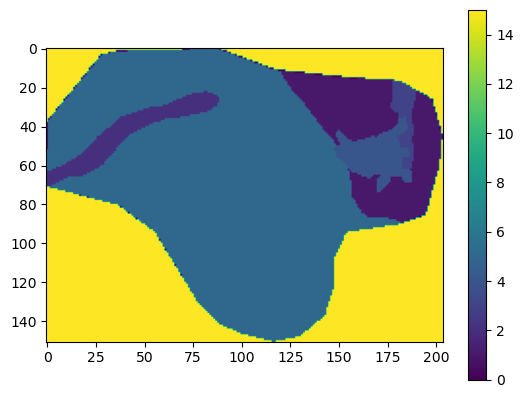

In [80]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Geo_superf1.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia<-100,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape

In [81]:
np.unique(geologia)

array([ 0.,  1.,  2.,  3.,  4.,  5., 15.])

# Elevacion:


(19705,)

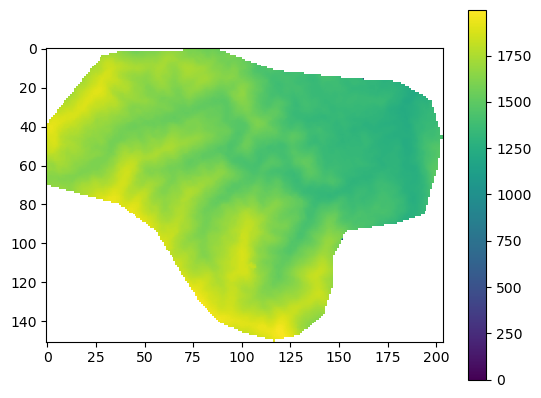

In [82]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/elev_final1.tif?raw=true')
elevacion=raster.read(1)
elevacion=np.where(elevacion<0,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

# Inventario:

(19705,)

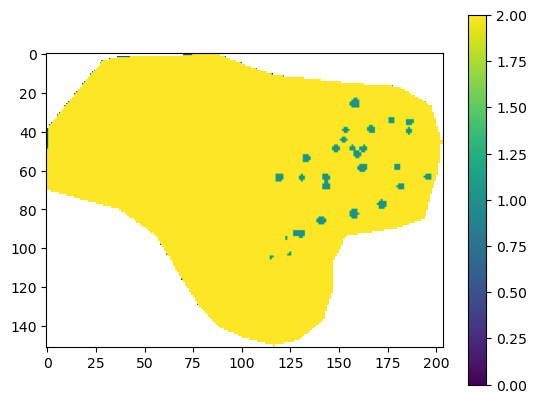

In [83]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/MenM1.tif?raw=true')
inventario=raster.read(1)
inventario=np.where(inventario>=3,np.nan,inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

# DataFrame

(19705,)

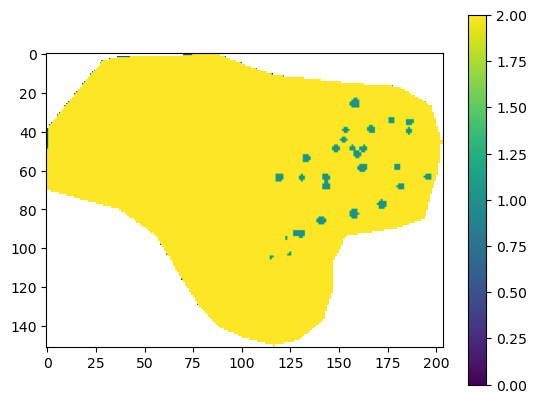

In [84]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/MenM1.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk * inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

In [85]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM, 'elevacion': elevacion_vector_MenM, 'cobertura':cobertura_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'aspecto', 'elevacion', 'cobertura']


In [86]:
df.head()

,inventario,pendiente,aspecto,elevacion,cobertura
0,0.0,20.832821,38.945808,1621.0,0.0
1,0.0,21.867115,45.000000,1614.0,0.0
2,0.0,20.780851,49.332314,1603.0,1.0
3,0.0,16.425795,31.504267,1596.0,1.0
4,0.0,15.849223,358.363434,1595.0,1.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inventario  19705 non-null  float64
 1   pendiente   19705 non-null  float32
 2   aspecto     19705 non-null  float32
 3   elevacion   19705 non-null  float64
 4   cobertura   19705 non-null  float64
dtypes: float32(2), float64(3)
memory usage: 615.9 KB


In [88]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 3 to 16849
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inventario  315 non-null    float64
 1   pendiente   315 non-null    float32
 2   aspecto     315 non-null    float32
 3   elevacion   315 non-null    float64
 4   cobertura   315 non-null    float64
dtypes: float32(2), float64(3)
memory usage: 12.3 KB


In [89]:
resumen=df1.describe().T
print(resumen)

            count         mean         std          min          25%  \
inventario  315.0     0.984127    0.125183     0.000000     1.000000   
pendiente   315.0    17.425673   11.142935     0.464550     8.171518   
aspecto     315.0   173.136093  113.014107     1.218874    67.007092   
elevacion   315.0  1376.292063   87.650274  1228.000000  1322.000000   
cobertura   315.0     0.974603    0.157577     0.000000     1.000000   

                    50%          75%          max  
inventario     1.000000     1.000000     1.000000  
pendiente     15.641928    26.747665    47.808998  
aspecto      159.775146   284.689255   359.635071  
elevacion   1369.000000  1419.000000  1915.000000  
cobertura      1.000000     1.000000     1.000000  


In [90]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

,pendiente,aspecto,elevacion,cobertura
0,20.832821,38.945808,1621.0,0.0
1,21.867115,45.000000,1614.0,0.0
2,20.780851,49.332314,1603.0,1.0
3,16.425795,31.504267,1596.0,1.0
4,15.849223,358.363434,1595.0,1.0


# Analisis univariado

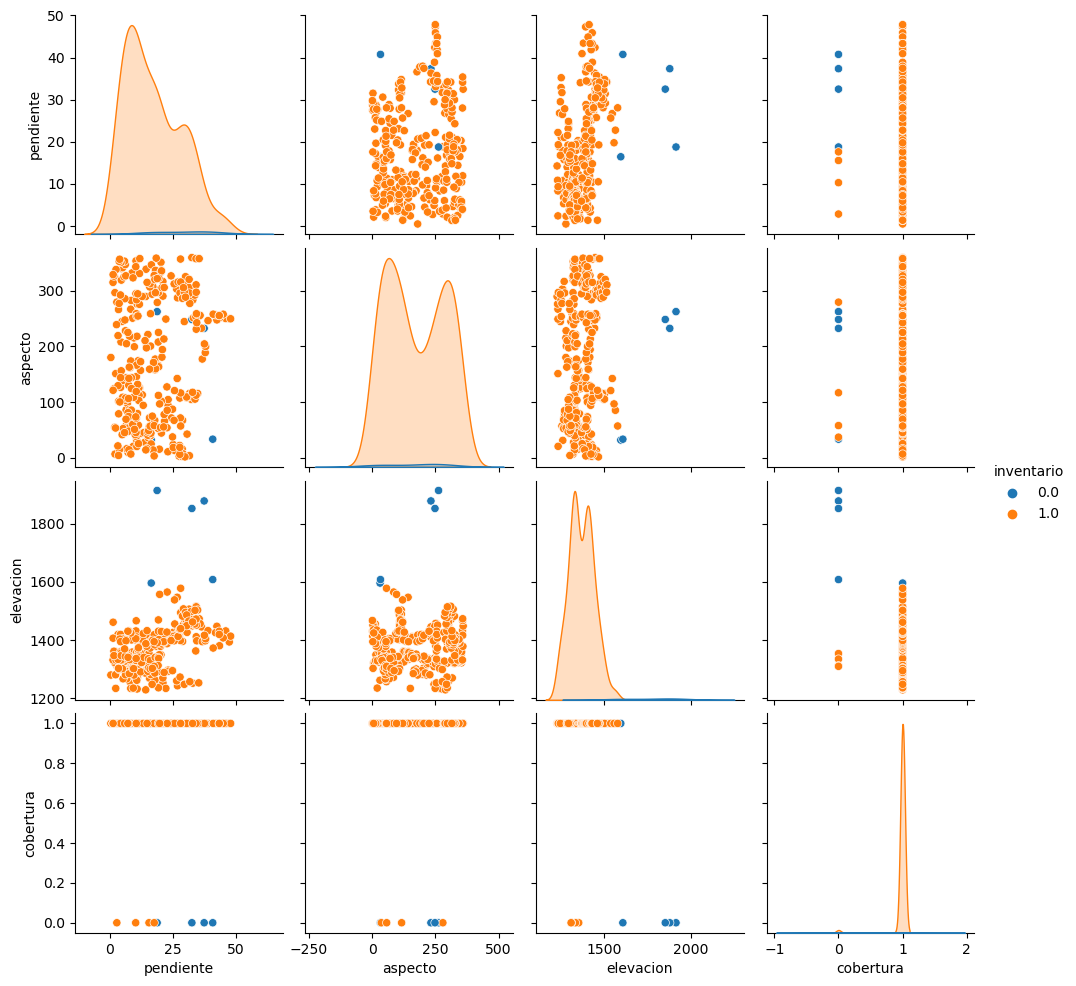

In [91]:
sns.pairplot(df1, hue='inventario');

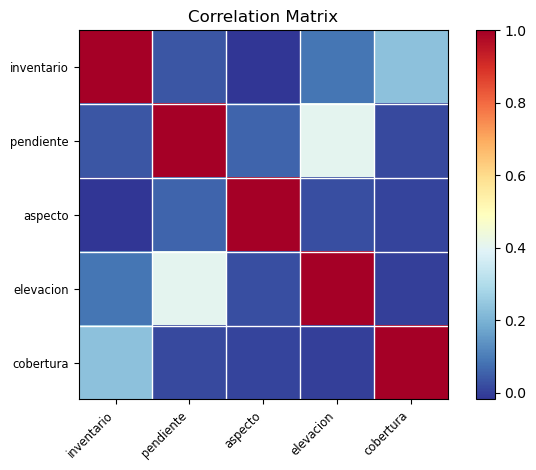

In [92]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

Text(0, 0.5, 'Frecuencia')

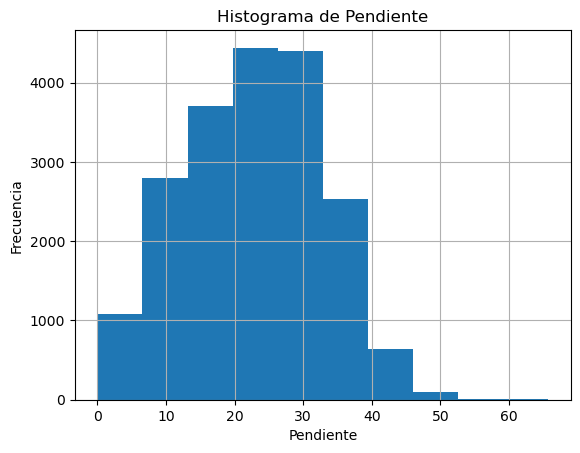

In [93]:
df.pendiente.hist()
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

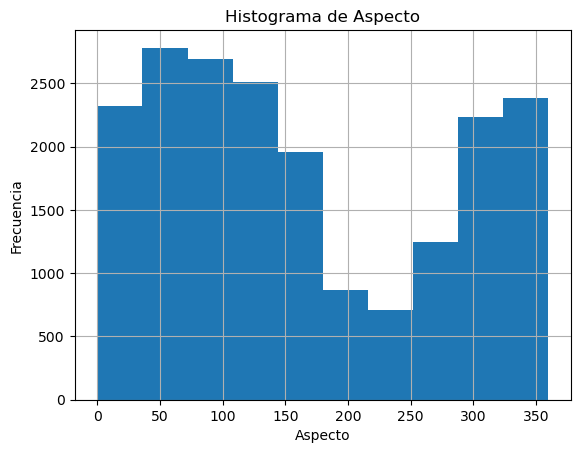

In [94]:
df.aspecto.hist()
plt.title('Histograma de Aspecto')
plt.xlabel('Aspecto')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

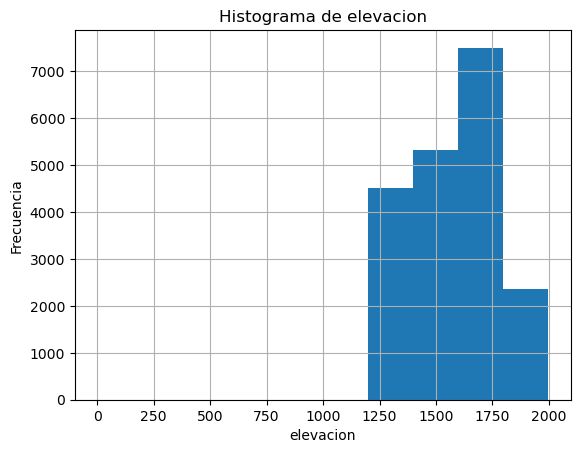

In [95]:
df.elevacion.hist()
plt.title('Histograma de elevacion')
plt.xlabel('elevacion')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

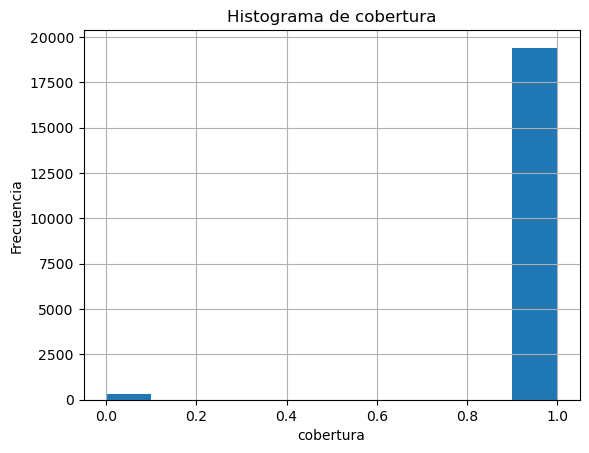

In [96]:
df.cobertura.hist()
plt.title('Histograma de cobertura')
plt.xlabel('cobertura')
plt.ylabel('Frecuencia')

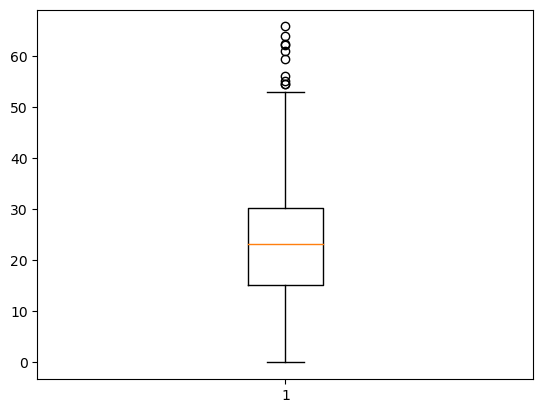

In [97]:
plt.boxplot(df['pendiente']);

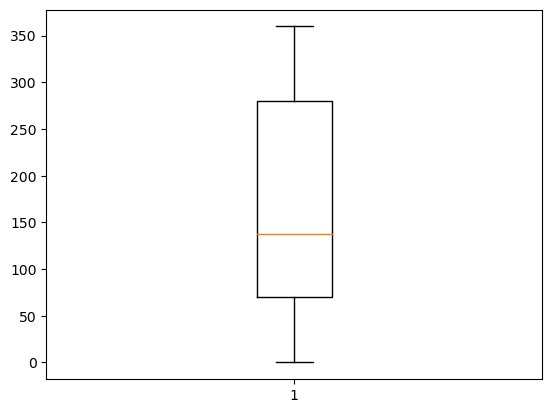

In [98]:
plt.boxplot(df['aspecto']);

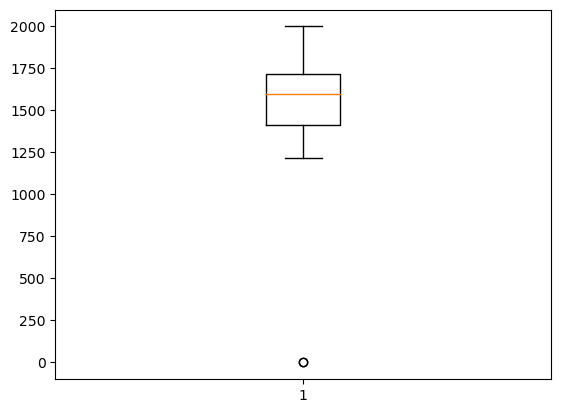

In [99]:
plt.boxplot(df['elevacion']);

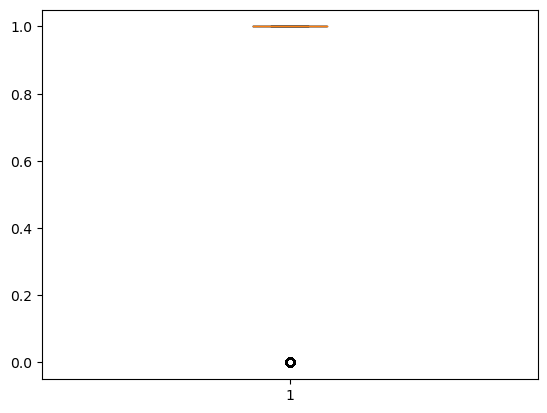

In [100]:
plt.boxplot(df['cobertura']);

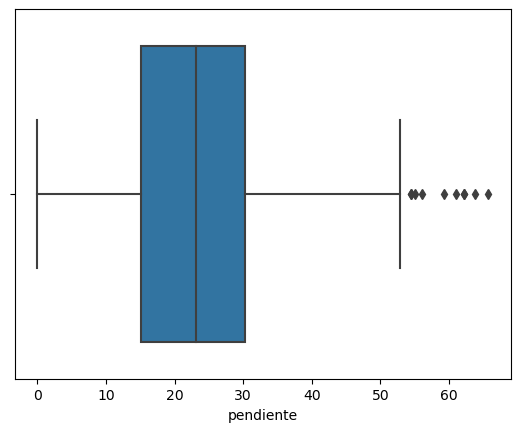

In [101]:
sns.boxplot(x='pendiente', data=df);

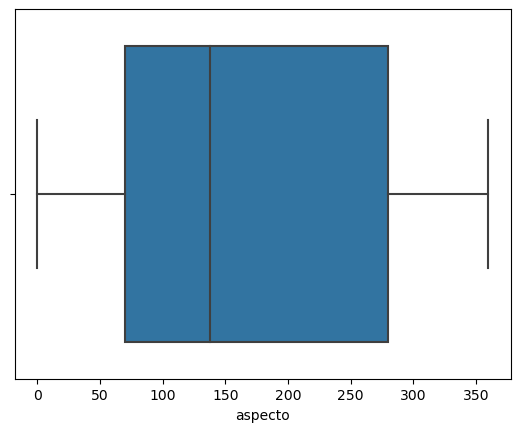

In [102]:
sns.boxplot(x='aspecto', data=df);

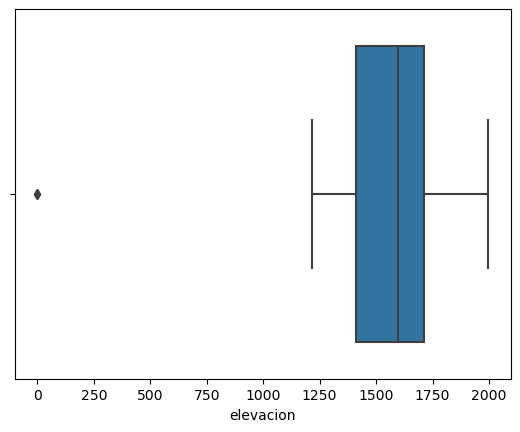

In [103]:
sns.boxplot(x='elevacion', data=df);

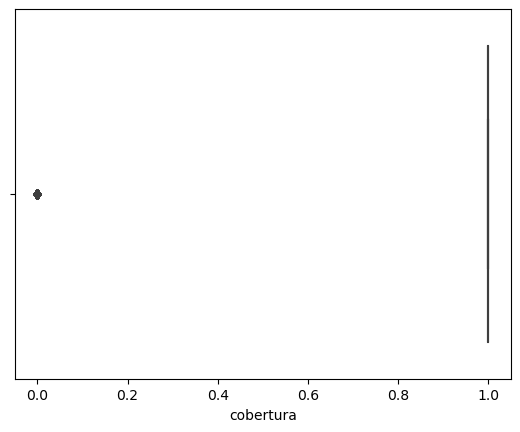

In [104]:
sns.boxplot(x='cobertura', data=df);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


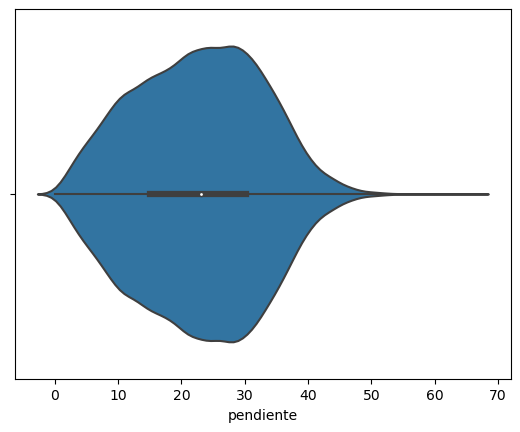

In [105]:
sns.violinplot(df['pendiente']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


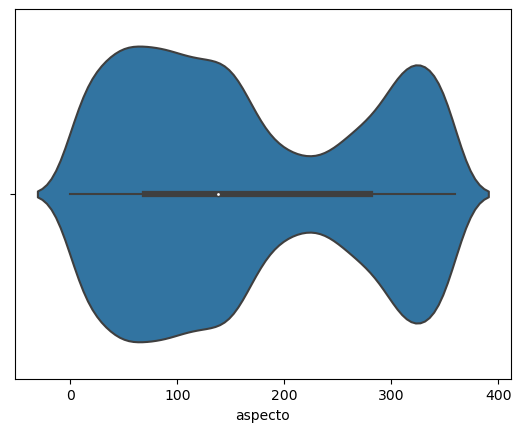

In [106]:
sns.violinplot(df['aspecto']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


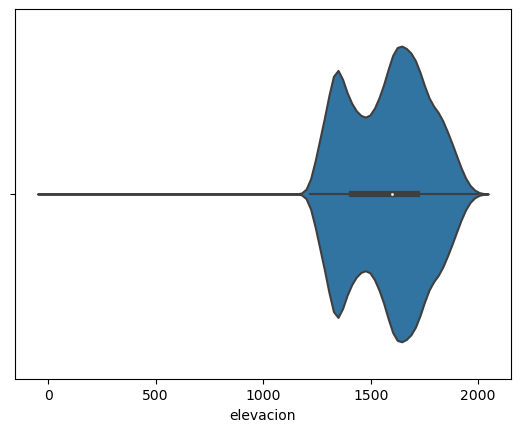

In [107]:
sns.violinplot(df['elevacion']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


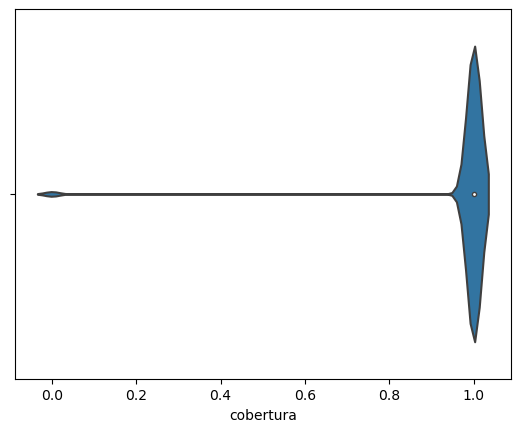

In [108]:
sns.violinplot(df['cobertura']);

# Analisis multivariado

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


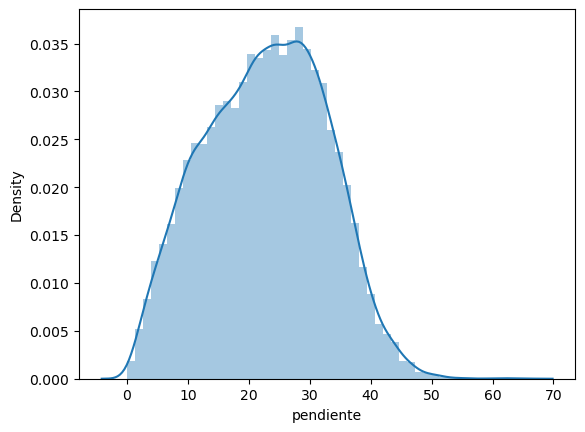

In [109]:
sns.distplot(df['pendiente']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


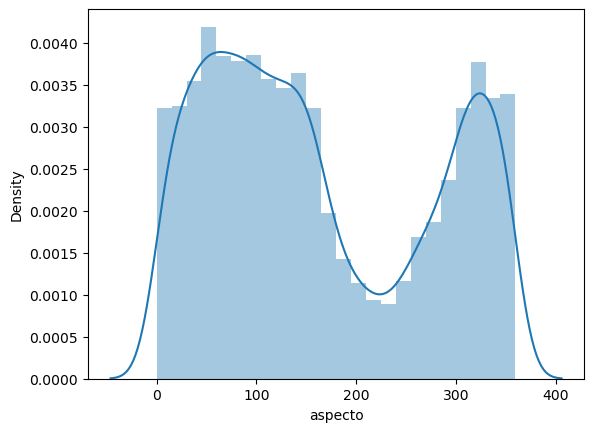

In [110]:
sns.distplot(df['aspecto']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


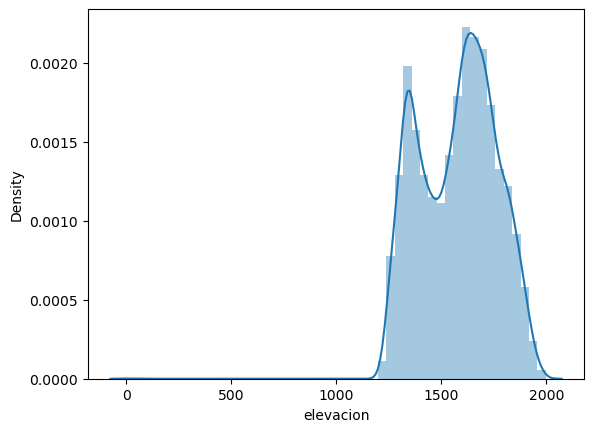

In [111]:
sns.distplot(df['elevacion']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


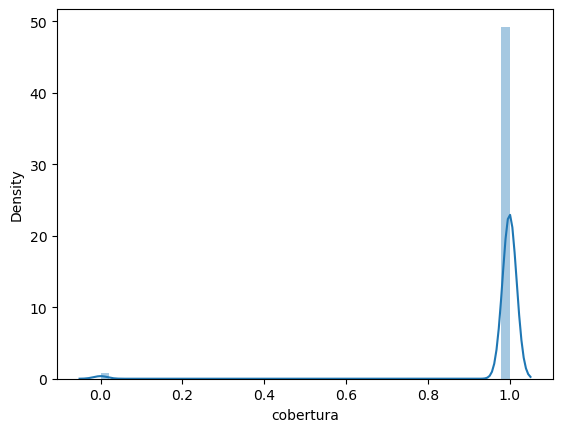

In [112]:
sns.distplot(df['cobertura']);

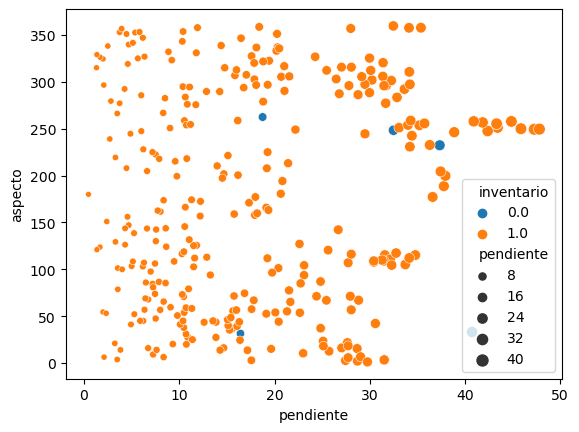

In [113]:
sns.scatterplot(x="pendiente", y="aspecto", hue="inventario", size='pendiente',data=df1);

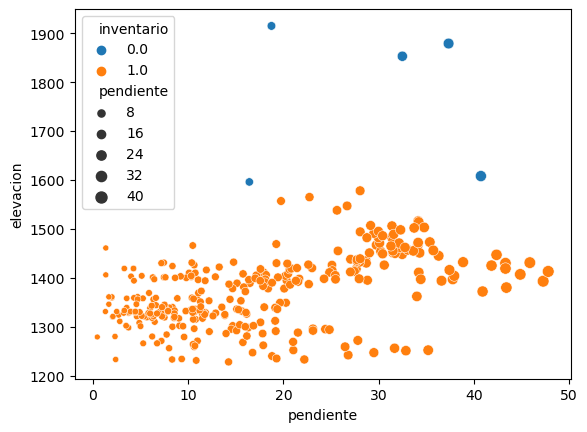

In [114]:
sns.scatterplot(x="pendiente", y="elevacion", hue="inventario", size='pendiente',data=df1);

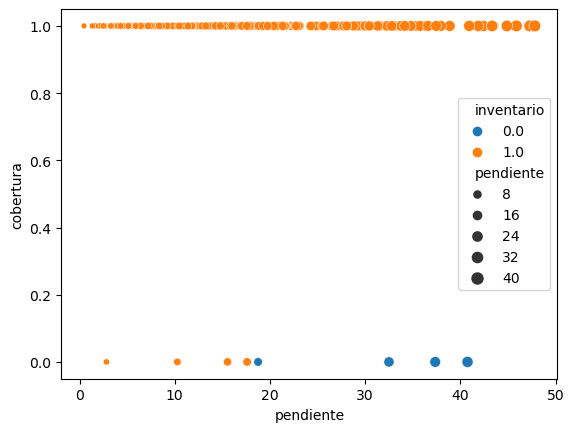

In [115]:
sns.scatterplot(x="pendiente", y="cobertura", hue="inventario", size='pendiente',data=df1);

In [116]:
media=df.groupby('inventario').mean()
print(media)

            pendiente     aspecto    elevacion  cobertura
inventario                                               
0.0         28.266462  200.876709  1715.156863   0.078431
1.0         17.236561  173.323044  1369.938710   0.987097
2.0         22.832577  164.139877  1579.279415   0.986869


In [117]:
#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

2.0    19344
1.0      310
0.0       51
Name: inventario, dtype: int64

In [118]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

In [119]:
si_lands.count()

inventario    19654
pendiente     19654
aspecto       19654
elevacion     19654
cobertura     19654
dtype: int64

In [120]:
no_lands.count()

inventario    51
pendiente     51
aspecto       51
elevacion     51
cobertura     51
dtype: int64

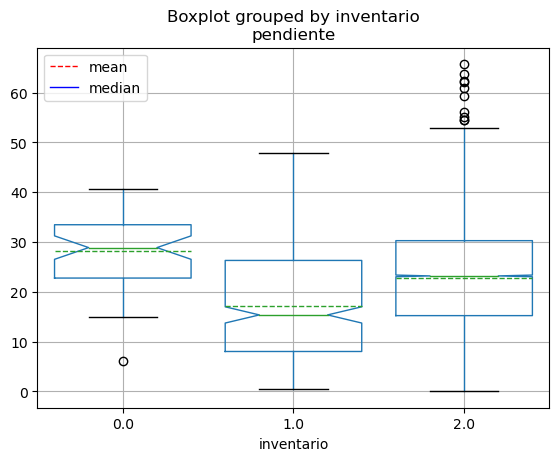

In [121]:
df.boxplot('pendiente', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

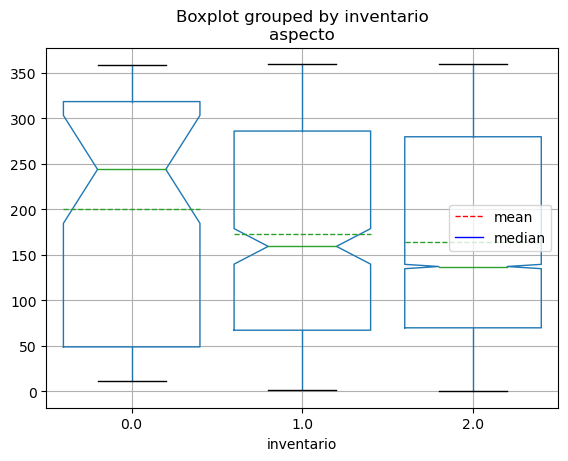

In [122]:
df.boxplot('aspecto', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

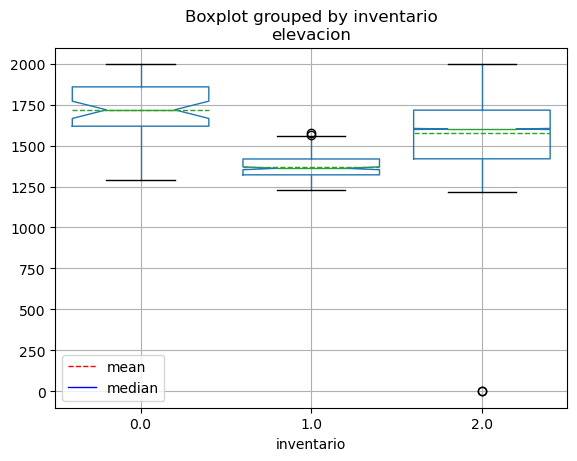

In [123]:
df.boxplot('elevacion', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

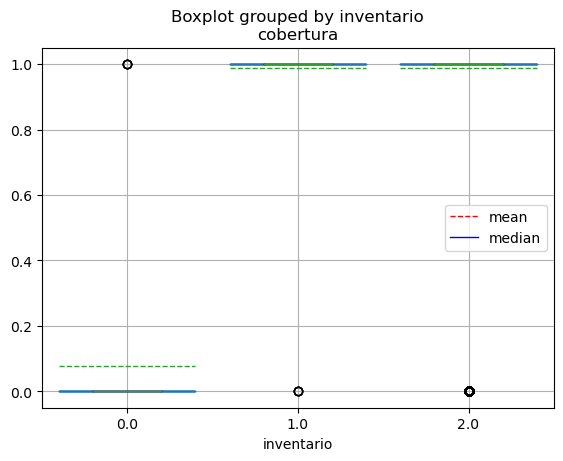

In [124]:
df.boxplot('cobertura', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [125]:
from scipy import stats
stats.ttest_ind(no_lands["pendiente"], si_lands["pendiente"])

Ttest_indResult(statistic=3.9561099663786594, pvalue=7.644682534352887e-05)

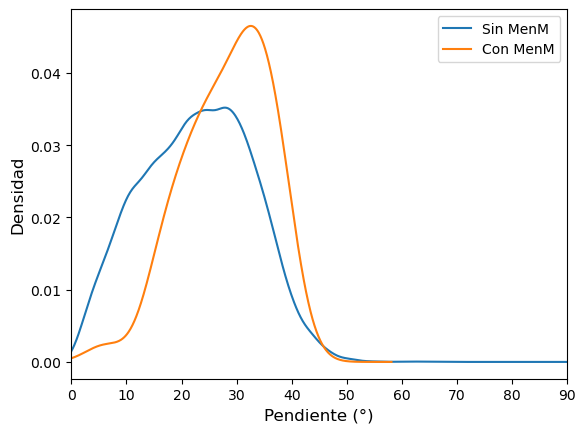

In [126]:
fig, ax = plt.subplots()
si_lands['pendiente'].plot.kde(ax=ax, label='Sin MenM')
no_lands['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

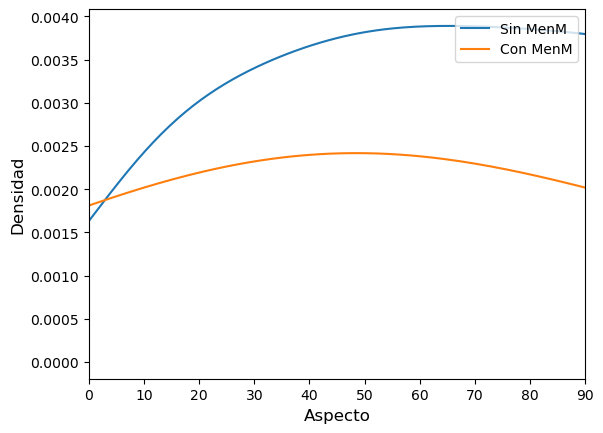

In [127]:
fig, ax = plt.subplots()
si_lands['aspecto'].plot.kde(ax=ax, label='Sin MenM')
no_lands['aspecto'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Aspecto', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

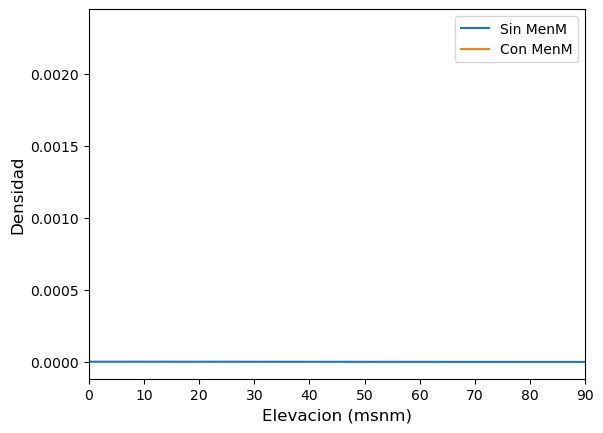

In [128]:
fig, ax = plt.subplots()
si_lands['elevacion'].plot.kde(ax=ax, label='Sin MenM')
no_lands['elevacion'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Elevacion (msnm)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

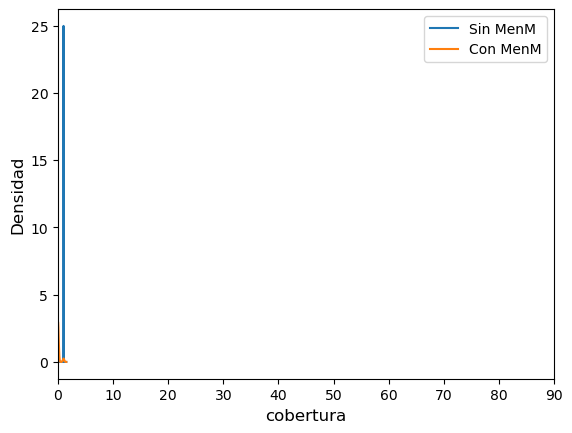

In [129]:
fig, ax = plt.subplots()
si_lands['cobertura'].plot.kde(ax=ax, label='Sin MenM')
no_lands['cobertura'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('cobertura', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


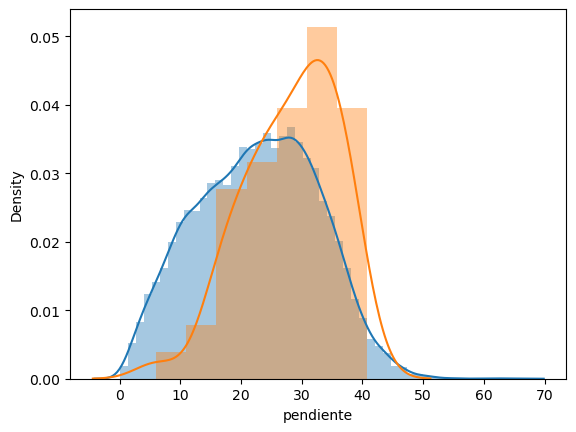

In [130]:
sns.distplot(si_lands['pendiente'])
sns.distplot(no_lands['pendiente']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


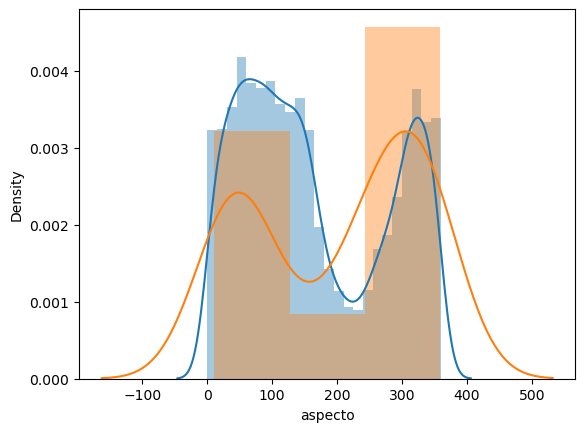

In [131]:
sns.distplot(si_lands['aspecto'])
sns.distplot(no_lands['aspecto']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


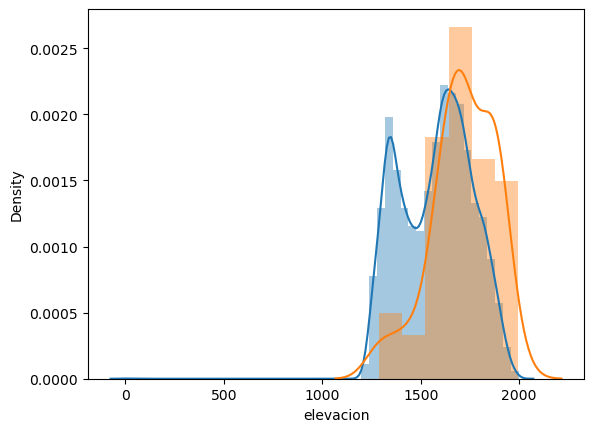

In [132]:
sns.distplot(si_lands['elevacion'])
sns.distplot(no_lands['elevacion']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


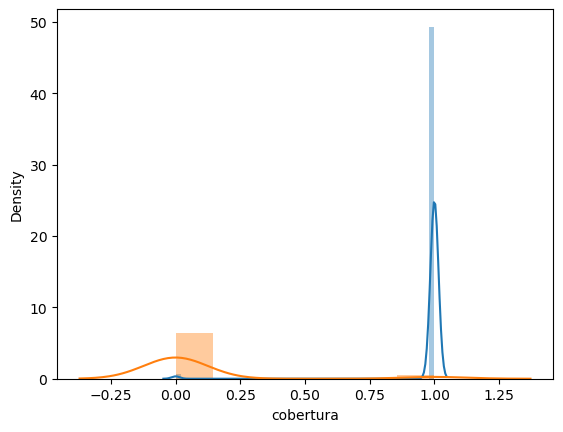

In [133]:
sns.distplot(si_lands['cobertura'])
sns.distplot(no_lands['cobertura']);

In [134]:

#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

2.0    19344
1.0      310
0.0       51
Name: inventario, dtype: int64

#### Numero de celdas con MenM = 310

# Analisis de componentes principales

In [135]:
#se importan todas las librerias a utilizar
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [136]:
#Se importan los archivos
data= df
puntos=data['inventario']
data.drop('inventario', axis=1, inplace=True)

# Se debe escalar los datos antes de aplicar PCA
data = pd.DataFrame(scale(data), columns=(['pendiente','aspecto'])
                    
## Se implementa el análisi PCA con la libreria sklearn de python
n = len(data.columns)
pca = PCA(n_components=n)
pca = pca.fit(data)
pca_samples = pca.transform(data)

SyntaxError: invalid syntax (3275675247.py, line 10)

In [ ]:
#Se puede graficar cuanto aporta a la varianza cada componente generado
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de python
# 0,1 denota el componente princiapl 1 y 2 (PC1 and PC2); para otros componentes se modifica el número
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(data)[:,0] # Componente principal 1
ys = pca.transform(data)[:,1] # Componente principal 2

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys ) 

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*0.5*max(xs), yvector[i]*0.5*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*0.5*max(xs)*1.2, yvector[i]*0.5*max(ys)*1.2,
             list(data.columns.values)[i], color='r') 

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)
plt.ylim([-15, 50])
plt.show()
